<a href="https://colab.research.google.com/github/samthakur587/Major-project-/blob/main/india_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/india_data.csv')
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 00:00:00,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 00:00:00,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
2,2020-02-01 00:00:00,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
3,2020-02-02 00:00:00,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 00:00:00,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [ ]:
df.shape

(13182, 7)

In [ ]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
df = df.rename(columns= { 'Province/State':'state','Country/Region':'country'})

In [ ]:
df.isnull().sum()

ObservationDate      0
state              132
country              0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13050 entries, 132 to 13181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  13050 non-null  object 
 1   state            13050 non-null  object 
 2   country          13050 non-null  object 
 3   Last Update      13050 non-null  object 
 4   Confirmed        13050 non-null  float64
 5   Deaths           13050 non-null  float64
 6   Recovered        13050 non-null  float64
dtypes: float64(3), object(4)
memory usage: 815.6+ KB


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13050 entries, 132 to 13181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  13050 non-null  datetime64[ns]
 1   state            13050 non-null  object        
 2   country          13050 non-null  object        
 3   Last Update      13050 non-null  object        
 4   Confirmed        13050 non-null  float64       
 5   Deaths           13050 non-null  float64       
 6   Recovered        13050 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 815.6+ KB


##=> ***NOW WE ARE PLOTING THE GRAPH OF DATA USING MATPLOTLIB***


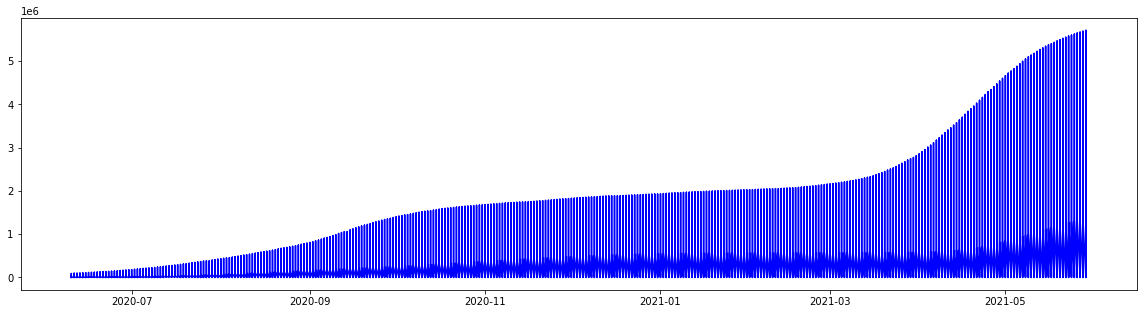

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Confirmed'] , color= 'b')


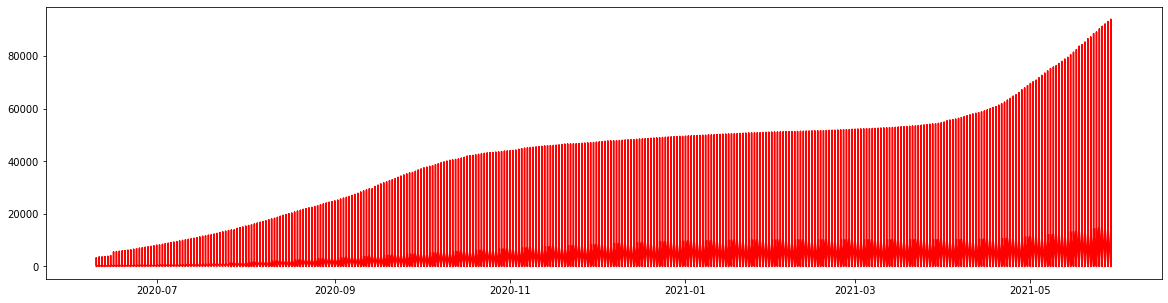

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Deaths'] , color='r')

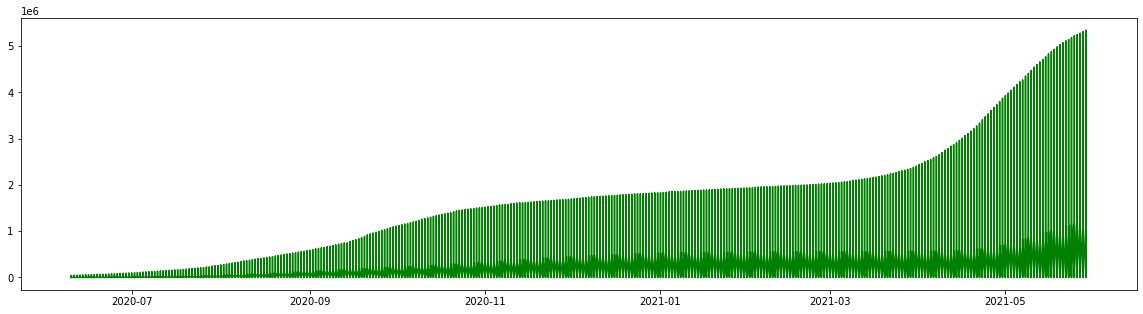

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Recovered'] , color='g')

##=> ***NOW WE ARE DOING THE FORCASTING FOR CONFIRMED CASES***


In [ ]:
df1 = df.iloc[:,[0,4]]
df1

,ObservationDate,Confirmed
132,2020-06-10,33.0
133,2020-06-10,5070.0
134,2020-06-10,57.0
135,2020-06-10,2937.0
136,2020-06-10,5459.0
...,...,...
13177,2021-05-29,50739.0
13178,2021-05-29,0.0
13179,2021-05-29,1688152.0
13180,2021-05-29,327112.0


In [ ]:
df1 = df1.rename(columns ={'Confirmed':'y','ObservationDate':'ds'})

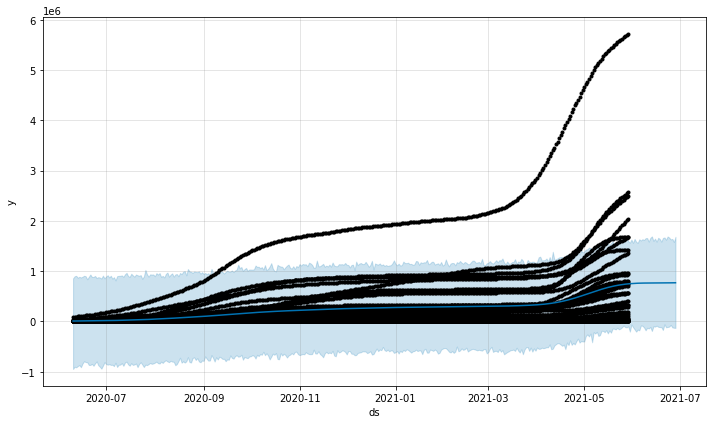

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95 ,daily_seasonality=True,yearly_seasonality=True)
model.fit(df1)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot1 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


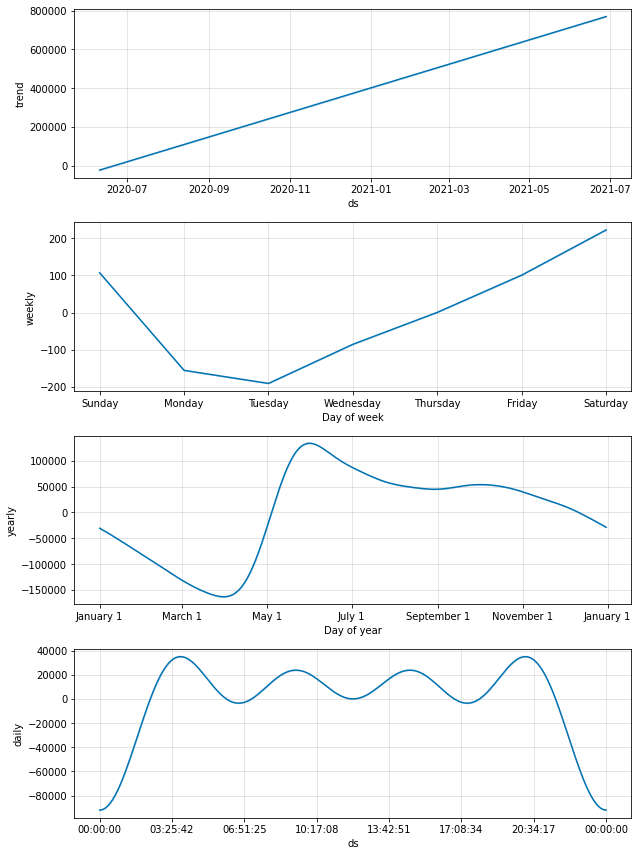

In [ ]:
plot2 = model.plot_components(prediction)

=> ***now we are doing cross valition of our data to find out how much error are occers in our forcating data***

In [ ]:
#cross validation 
#we have a data from 2020-01 to 2021-06
#2020-01 to 2020-09 - training part
#2020-09 to 2021-06 - testing part
#future data is 30 day our - validation

In [ ]:
df1['ds'].nunique()

354

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='200 days' ,period='15 days' ,horizon='30 days')
df_cv.head()
df_cv.shape

INFO:fbprophet:Making 9 forecasts with cutoffs between 2020-12-30 00:00:00 and 2021-04-29 00:00:00


(9990, 6)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,3 days,2.698691e+11,519489.315815,323062.445185,1.327260,0.889890
1,4 days,2.752874e+11,524678.372351,324520.722994,1.300520,0.888889
2,5 days,2.808286e+11,529932.669918,325900.192117,1.270510,0.887888
3,6 days,2.865757e+11,535327.644518,327233.620147,1.236682,0.883884
4,7 days,2.927262e+11,541041.797087,328587.424800,1.190459,0.881882


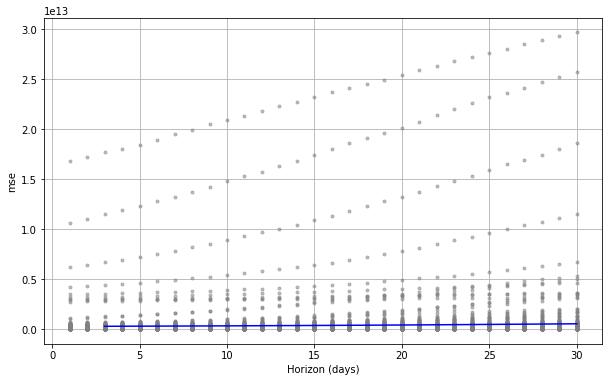

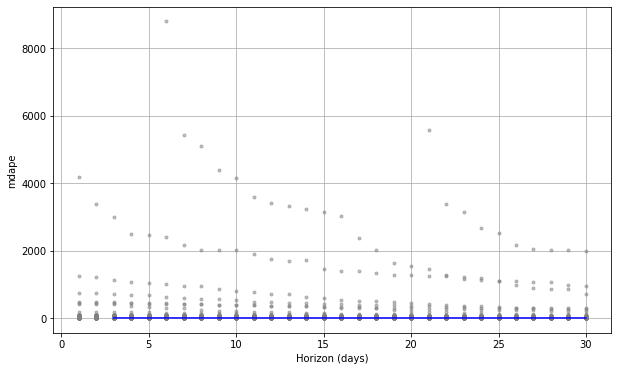

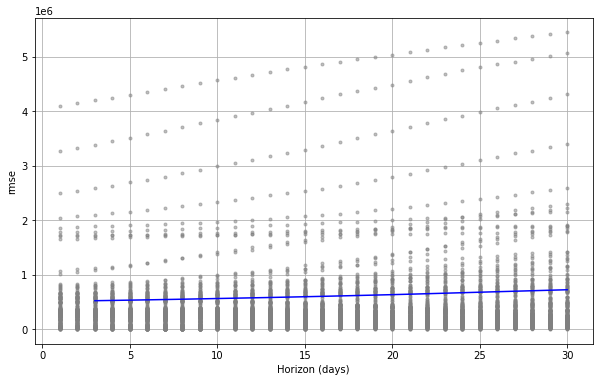

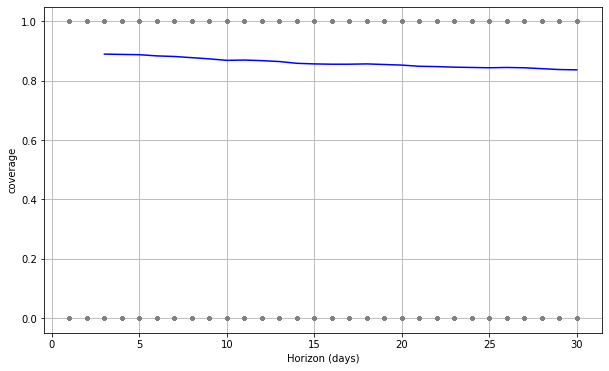

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv ,metric='mse')
fig = plot_cross_validation_metric(df_cv ,metric='mdape')
fig = plot_cross_validation_metric(df_cv ,metric='rmse')
fig = plot_cross_validation_metric(df_cv ,metric='coverage')


***=>•Which country/state is having highest number of cases?***

***run*** this shell : 

In [ ]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list1 = []
list2 = []
for i in range(0,37):
  df_count = df[df['state'] == array[i]]
  sum = df_count['Confirmed'].sum()
  list1.append(sum)
  list2.append(array[i])
data_cnf = pd.DataFrame(list(zip(list2,list1)), columns=['state','confirmedcases'])
data_cnf.head()
data_cnf.to_csv('confiremed_cases.csv',index=False)
print("THE HIGHEST CONFIREMED_CASES ARE : {0} ".format(np.max(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.max(data_cnf['confirmedcases']) ]


THE HIGHEST CONFIREMED_CASES ARE : 681186928.0 


,state,confirmedcases
21,Maharashtra,681186928.0


**=> •Which country/state is having lowest number of cases?**

***run this shell : ***

In [ ]:
print("THE LOWEST CONFIREMED_CASES ARE : {0} ".format(np.min(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.min(data_cnf['confirmedcases']) ]

THE LOWEST CONFIREMED_CASES ARE : 22.0 


,state,confirmedcases
7,Dadar Nagar Haveli,22.0


# **NOW WE ARE FORCASTING FOR TOTAL DEATHS** 

In [ ]:
df2 = df.iloc[:,[0,5]]
df2

,ObservationDate,Deaths
132,2020-06-10,0.0
133,2020-06-10,77.0
134,2020-06-10,0.0
135,2020-06-10,4.0
136,2020-06-10,32.0
...,...,...
13177,2021-05-29,507.0
13178,2021-05-29,0.0
13179,2021-05-29,20208.0
13180,2021-05-29,6360.0


In [ ]:
df2 = df2.rename(columns ={'Deaths':'y','ObservationDate':'ds'})

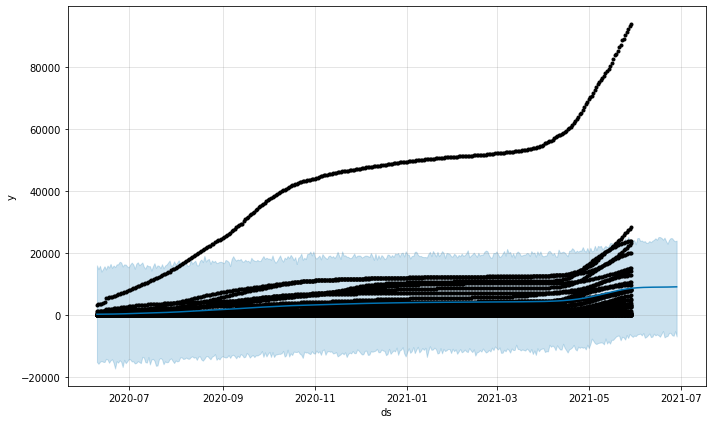

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
model.fit(df2)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot3 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


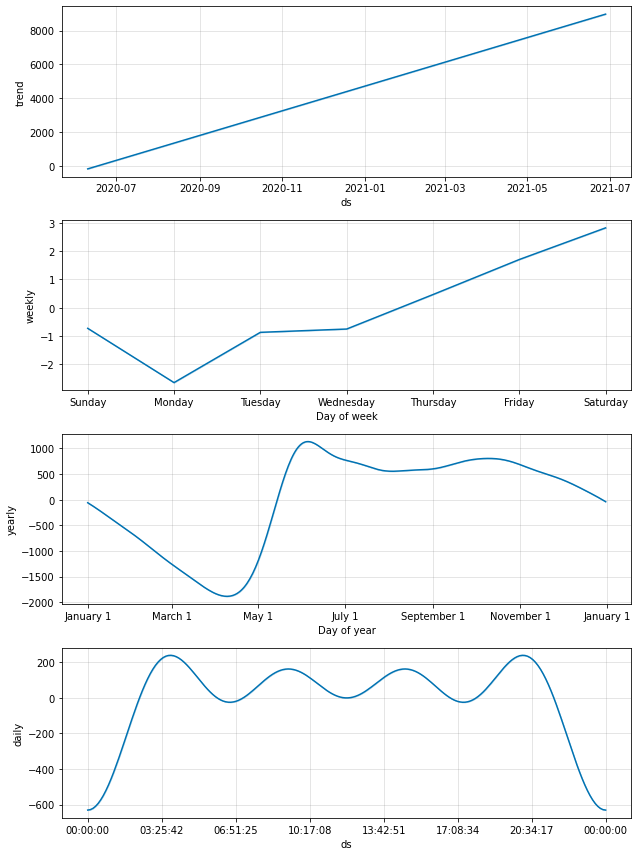

In [ ]:
plot4 = model.plot_components(prediction)

**=>•Which country/state is having highest number of deaths?**

In [ ]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list3 = []
list4 = []
for i in range(0,37):
  df_death = df[df['state'] == array[i]]
  sum = df_death['Deaths'].sum()
  list3.append(sum)
  list4.append(array[i])
data_ded = pd.DataFrame(list(zip(list4,list3)), columns=['state','Deaths'])
data_ded.head()
data_ded.to_csv('total_deaths.csv',index=False)
print("THE HIGHEST Deaths  ARE : {0} ".format(np.max(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.max(data_ded['Deaths']) ]


THE HIGHEST Deaths  ARE : 14980930.0 


,state,Deaths
21,Maharashtra,14980930.0


**=>•Which country/state is having lowest number of deaths?**

In [ ]:
print("THE LOWEST DEATHS ARE : {0} ".format(np.min(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.min(data_ded['Deaths']) ]

THE LOWEST DEATHS ARE : 0.0 


,state,Deaths
7,Dadar Nagar Haveli,0.0
34,Unknown,0.0


# ***here we are forcating the recoverd cases***

In [ ]:
df3 = df.iloc[:,[0,6]]
df3

,ObservationDate,Recovered
132,2020-06-10,33.0
133,2020-06-10,2802.0
134,2020-06-10,1.0
135,2020-06-10,1085.0
136,2020-06-10,2864.0
...,...,...
13177,2021-05-29,43190.0
13178,2021-05-29,0.0
13179,2021-05-29,1621743.0
13180,2021-05-29,289642.0


In [ ]:
df3 = df3.rename(columns ={'Recovered':'y','ObservationDate':'ds'})

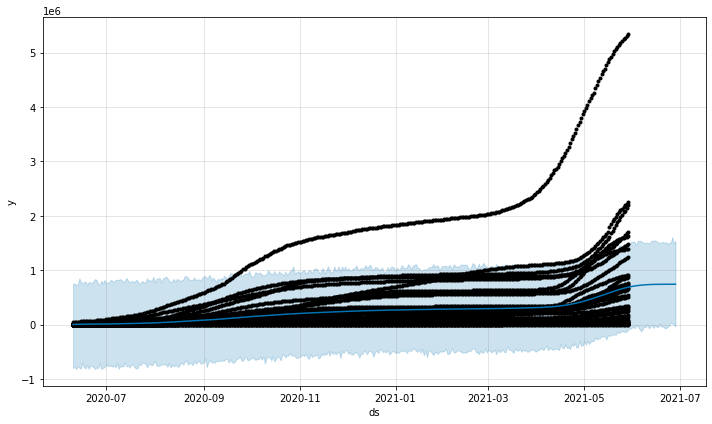

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True , yearly_seasonality=True)
model.fit(df3)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot6 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


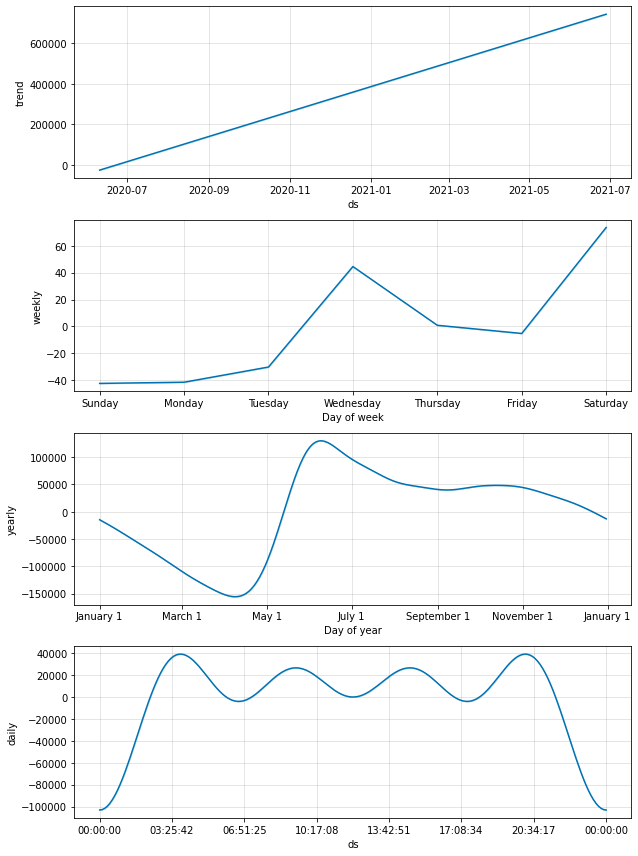

In [ ]:
plot5 = model.plot_components(prediction)

***=> which country/state is having highest people recoverd ***

In [ ]:
import numpy as np
array = np.unique(df['state'])
df['state'].value_counts()
list5 = []
list6 = []
for i in range(0,37):
  df_recov = df[df['state'] == array[i]]
  sum = df_recov['Recovered'].sum()
  list5.append(sum)
  list6.append(array[i])
data_rec = pd.DataFrame(list(zip(list6,list5)), columns=['state','recover'])
data_rec.head()
data_rec.to_csv('total_recover.csv',index=False)
print("THE HIGHEST RECOVERD  ARE : {0} ".format(np.max(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.max(data_rec['recover']) ]


THE HIGHEST RECOVERD  ARE : 597480809.0 


,state,recover
21,Maharashtra,597480809.0


***=> which country/state is having lowest people recoverd ***

In [ ]:
print("THE LOWEST recover ARE : {0} ".format(np.min(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.min(data_rec['recover'])]

THE LOWEST recover ARE : 0.0 


,state,recover
34,Unknown,0.0
